In [2]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# loading the csv data to a Pandas DataFrame
rape_data = pd.read_csv('Data/Violent/20_Victims_of_rape.csv')

In [5]:
# Making new column for Total with adding all from column 5 to end
# rape_data['Total'] = rape_data.iloc[:, 5:].sum(axis=1)
# Make the spatial datas column State/ut all capital
rape_data['Area_Name'] = rape_data['Area_Name'].str.title()
# Make the state/ut column all capital
rape_data['Area_Name'] = rape_data['Area_Name'].str.upper()

In [8]:
# Processing the data adding all the values in the Victims_Total column and grouping by year
year_wise = rape_data.groupby('Year')['Victims_of_Rape_Total'].sum()
state_wise = rape_data.groupby('Area_Name')['Victims_of_Rape_Total'].sum().sort_values()
state_wise_other = state_wise.sort_values(ascending=False)
others = state_wise_other[state_wise_other/state_wise_other.sum() < 0.025].sum()
state_wise_other = state_wise_other[state_wise_other/state_wise_other.sum() >= 0.025]
state_wise_other['Others'] = others

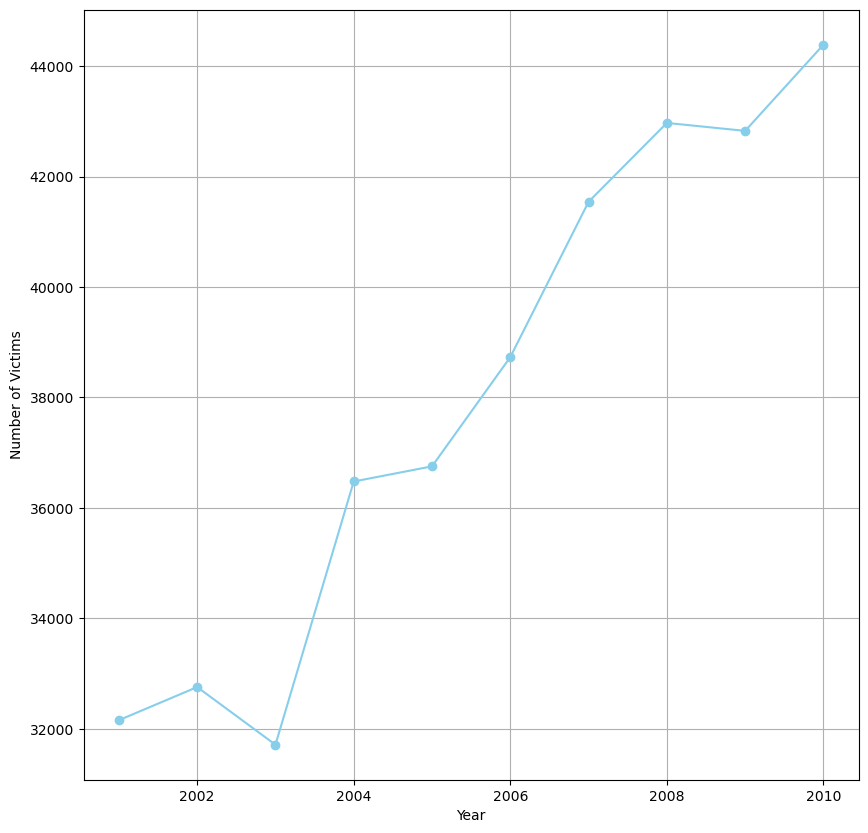

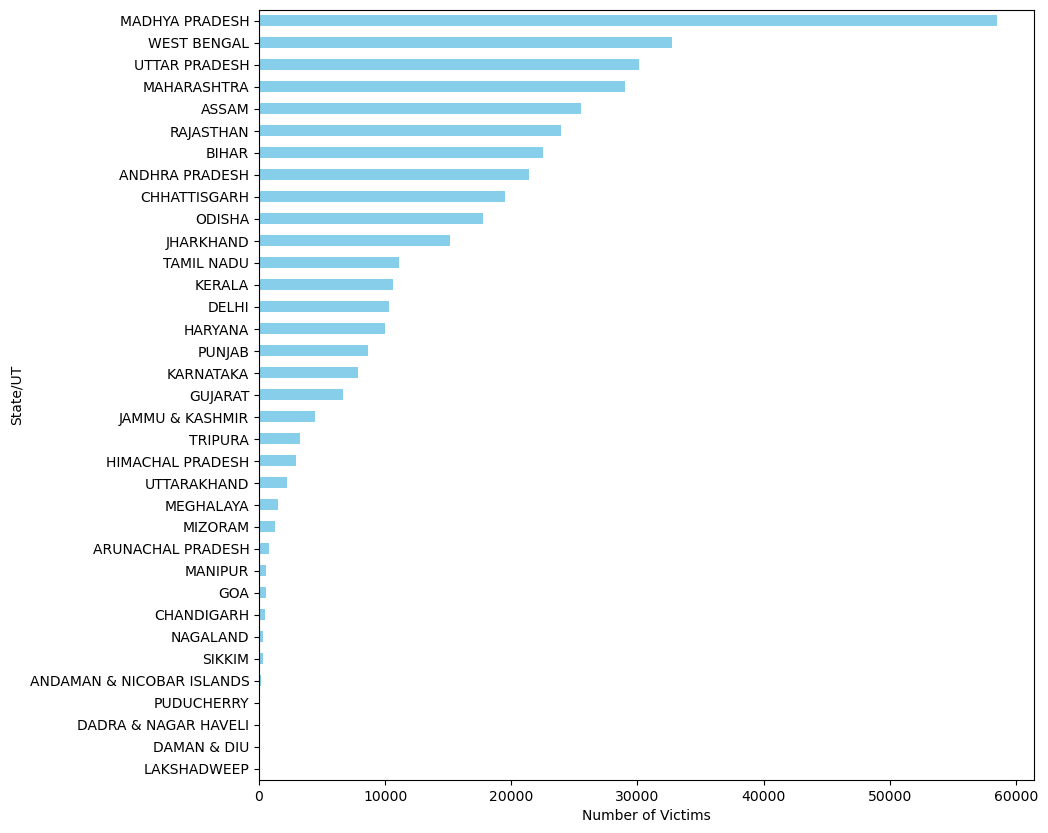

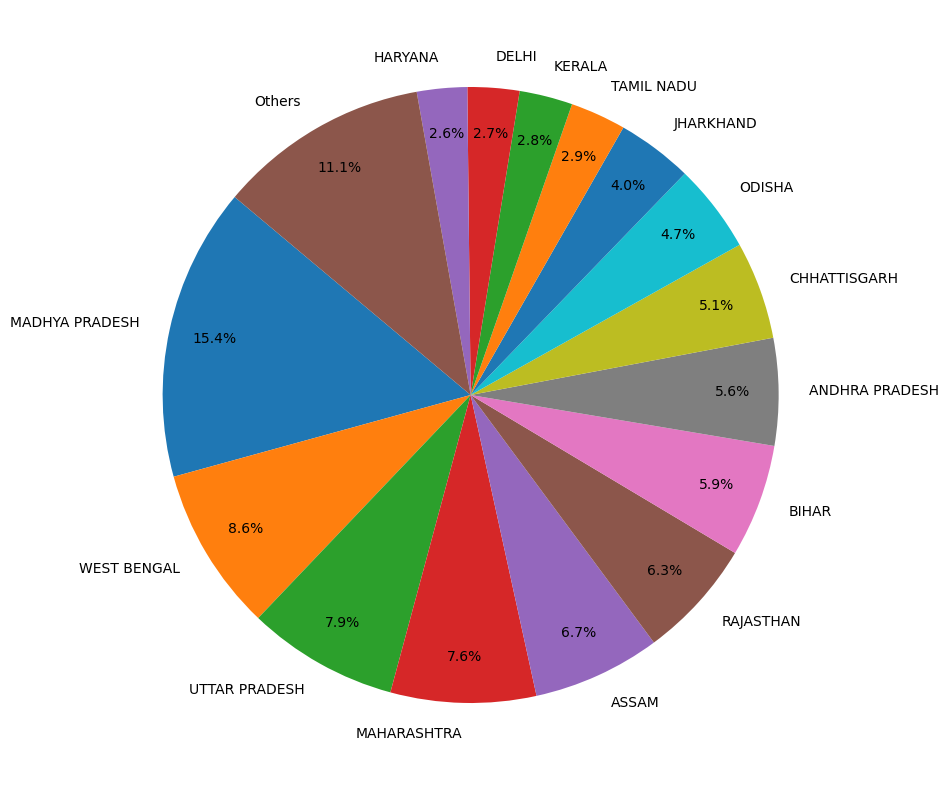

In [9]:
# plotting the data points in 2D
plt.figure(figsize=(10,10))
year_wise.plot(kind='line',marker='o',color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
state_wise.plot(kind='barh',color='skyblue')
plt.xlabel('Number of Victims')
plt.ylabel('State/UT')
plt.show()

plt.figure(figsize=(10,10))
state_wise_other.plot(kind='pie',autopct='%1.1f%%',startangle=140,pctdistance=0.85)
plt.ylabel('')
plt.show()

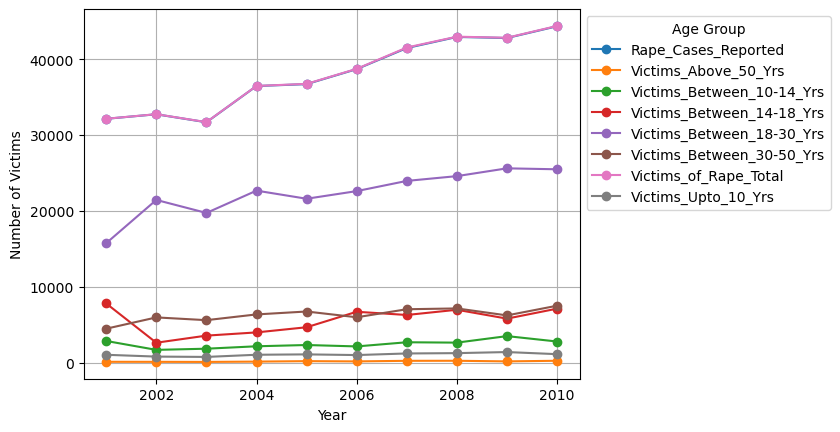

In [11]:
# Making a new column 'Yearly_Total' by summing all columns for each year
yearly_totals = rape_data.groupby('Year').sum(numeric_only=True)
yearly_totals.plot(kind='line',marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
plt.show()